# T-test

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

import seaborn as sns
import yfinance as yf

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [2]:
bac_df = pd.read_csv('../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bk_df = pd.read_csv('../data/BK_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)

In [3]:
bac_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-12-31,19.101077,19.101077,18.822426,18.861378,5397400,0.0,0.0
2002-01-02,18.669628,18.906331,18.609703,18.864384,8669200,0.0,0.0
2002-01-03,18.864382,19.146030,18.804457,18.843409,8237600,0.0,0.0
2002-01-04,18.912315,19.220929,18.879356,19.137033,10598600,0.0,0.0
2002-01-07,18.696586,18.990218,18.696586,18.909319,10852200,0.0,0.0


In [4]:
bk_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-12-31,26.588255,26.880790,26.490742,26.523245,1106703,0.0,0.0
2002-01-02,26.523270,26.653287,25.879690,26.646786,1397930,0.0,0.0
2002-01-03,26.750778,27.368352,26.750778,27.238337,2267556,0.0,0.0
2002-01-04,27.595880,27.940422,27.472366,27.699894,1658780,0.0,0.0
2002-01-07,28.538502,28.701022,27.953431,28.571007,3413033,0.0,0.0


In [5]:
bac_returns_df = np.log(bac_df['Close'].div(bac_df['Close'].shift(1)))
bac_returns_df

Date
2001-12-31         NaN
2002-01-02    0.000159
2002-01-03   -0.001113
2002-01-04    0.015462
2002-01-07   -0.011971
                ...   
2022-12-23    0.002467
2022-12-27    0.001846
2022-12-28    0.007351
2022-12-29    0.011228
2022-12-30   -0.000604
Name: Close, Length: 5288, dtype: float64

In [6]:
bk_returns_df = np.log(bk_df['Close'].div(bk_df['Close'].shift(1)))
bk_returns_df

Date
2001-12-31         NaN
2002-01-02    0.004647
2002-01-03    0.021957
2002-01-04    0.016803
2002-01-07    0.030964
                ...   
2022-12-23    0.003815
2022-12-27    0.003800
2022-12-28   -0.004248
2022-12-29    0.022816
2022-12-30   -0.003071
Name: Close, Length: 5288, dtype: float64

In [7]:
full_df = pd.concat([bac_returns_df, bk_returns_df], axis=1)
full_df.dropna(inplace=True)
full_df.columns = ['bac_returns', 'bk_returns']

In [8]:
full_df

,bac_returns,bk_returns
Date,,
2002-01-02,0.000159,0.004647
2002-01-03,-0.001113,0.021957
2002-01-04,0.015462,0.016803
2002-01-07,-0.011971,0.030964
2002-01-08,-0.016133,-0.014208
...,...,...
2022-12-23,0.002467,0.003815
2022-12-27,0.001846,0.003800
2022-12-28,0.007351,-0.004248


In [42]:
ttest_ind(full_df['bac_returns'].iloc[:30], full_df['bk_returns'].iloc[:30])

Ttest_indResult(statistic=0.1694519703424449, pvalue=0.8660307818287919)

In [45]:
number_of_steps = full_df.shape[0] // 30 * 30
cols = ['statistics', 'pvalue']
t_df = pd.DataFrame(columns=cols)
for i in range(30, number_of_steps+1, 30):
    t_df = final_df.append(
                pd.Series(
                    [
                        ttest_ind(full_df['bac_returns'].iloc[:i], full_df['bk_returns'].iloc[:i])[0],
                        ttest_ind(full_df['bac_returns'].iloc[:i], full_df['bk_returns'].iloc[:i])[1],
                    ], index=cols
                ), ignore_index=True
            )
t_df

,statistics,pvalue
0,0.169452,0.866031
1,0.249466,0.803434
2,1.289369,0.198943
3,1.094488,0.274847
4,0.857664,0.391767
...,...,...
172,0.047616,0.962023
173,0.039479,0.968509
174,0.075260,0.940010
175,0.008627,0.993117


In [51]:
t_df['pvalue'].min()

0.188505620842825

<AxesSubplot:>

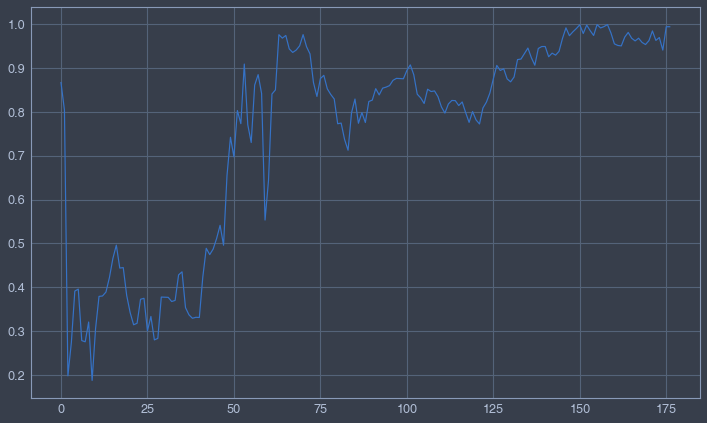

In [50]:
t_df['pvalue'].plot()

In [9]:
date_comb = full_df.copy()

In [21]:
date_comb

,bac_returns,bk_returns
Date,,
2002-01-02,0.000159,0.004647
2002-01-03,-0.001113,0.021957
2002-01-04,0.015462,0.016803
2002-01-07,-0.011971,0.030964
2002-01-08,-0.016133,-0.014208
...,...,...
2022-12-23,0.002467,0.003815
2022-12-27,0.001846,0.003800
2022-12-28,0.007351,-0.004248
